In [1]:
import numpy as np
import matplotlib.pyplot as plt


# **Reading Data**

Here we read our data from MNIST data set. You should download the data set and place it in a directory called "/MNIST Dataset " next to your code in order to run the code below.

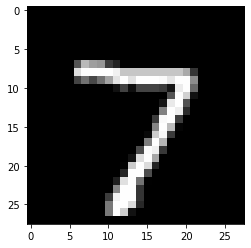

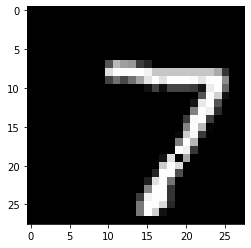

In [2]:

# A function to plot images
def show_image(img):
    image = img.reshape((28, 28))
    plt.imshow(image, 'gray')


# Reading The Train Set
train_images_file = open('MNIST Dataset/train-images.idx3-ubyte', 'rb')
train_images_file.seek(4)
num_of_train_images = int.from_bytes(train_images_file.read(4), 'big')
train_images_file.seek(16)

train_labels_file = open('MNIST Dataset/train-labels.idx1-ubyte', 'rb')
train_labels_file.seek(8)

train_set = []
train_img = []
train_lable = []
for n in range(num_of_train_images):
    image = np.zeros((784, 1))
    for i in range(784):
        image[i, 0] = int.from_bytes(train_images_file.read(1), 'big') / 256

    label_value = int.from_bytes(train_labels_file.read(1), 'big')
    label = np.zeros((10, 1))
    label[label_value, 0] = 1

    train_set.append((image, label))
    train_img.append(image.reshape(784))
    train_lable.append(label.reshape(10))


# Reading The Test Set
test_images_file = open('MNIST Dataset/t10k-images.idx3-ubyte', 'rb')
test_images_file.seek(4)

test_labels_file = open('MNIST Dataset/t10k-labels.idx1-ubyte', 'rb')
test_labels_file.seek(8)

num_of_test_images = int.from_bytes(test_images_file.read(4), 'big')
test_images_file.seek(16)

test_set = []
test_img = []
shifted_test_img = []
test_lable = []
for n in range(num_of_test_images):
    image = np.zeros((784, 1))
    for i in range(784):
        image[i] = int.from_bytes(test_images_file.read(1), 'big') / 256

    label_value = int.from_bytes(test_labels_file.read(1), 'big')
    label = np.zeros((10, 1))
    label[label_value, 0] = 1

    test_set.append((image, label))
    test_img.append(image.reshape(784))
    test_lable.append(label.reshape(10))
    image = np.roll(image.reshape(28, 28), 4)
    for i in range(28):
        for j in range(28):
            if j<4:
                image[i][i]=0
                
    shifted_test_img.append(image.reshape(784))


# Plotting an image
show_image(test_img[0])
plt.show()
show_image(shifted_test_img[0])
plt.show()

# **Usefull Functions** 

I defined some usefull functions that we need throughout this notebook. There are some activation functions and some other functions defined in the below cell.

In [3]:

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def derivative_sigmoid(x):
    return  sigmoid(x) * (1 - sigmoid(x))

def calculate_layers(inputs, w, b, activation="sigmoid"):
 
    if activation == "sigmoid":
            acv_fun = sigmoid
            dacv_fun = derivative_sigmoid
    if activation ==  "relu":
            acv_fun = rectified
            dacv_fun = derivative_rectified
    if activation ==  "tanh":
            acv_fun = tanh
            dacv_fun = derivative_tanh
            
            
    current = [inputs]
    i = 0
    for (weight, bias) in zip(w, b):
        if i == 2:
            current.append(sigmoid(np.dot(weight, current[-1]) + bias))
            break
        current.append(acv_fun(np.dot(weight, current[-1]) + bias))
        i += 1
    return current

def calculate_z(inputs, w, b, activation="sigmoid"):
  
    if activation == "sigmoid":
            acv_fun = sigmoid
            dacv_fun = derivative_sigmoid
    if activation ==  "relu":
            acv_fun = rectified
            dacv_fun = derivative_rectified
    if activation ==  "tanh":
            acv_fun = tanh
            dacv_fun = derivative_tanh
            
    current = [inputs]
    res = []
    
    for (weight, bias) in zip(w, b):           
        res.append(np.dot(weight, current[-1]) + bias)
        current.append(acv_fun(np.dot(weight, current[-1]) + bias))
    return res

def get_accuracy(output, labels):
    max_index = 0
    true_label = 0
    count = 0.0
    for i in range(np.shape(output)[0]):
        maximum = -1
        for j in range(np.shape(output)[1]):
            if output[i][j] > maximum:
                maximum = output[i][j]
                max_index = j
            if labels[i][j] == 1:
                true_label = j

        if max_index == true_label:
            count += 1
#         else:
#             print(f"{true_label} {max_index}")
    return count/np.shape(output)[0]


# rectified linear function
def rectified(x):
    return np.maximum(0,x)

def derivative_rectified(x):
    x[x<=0] = 0
    x[x>0] = 1
    return x

def tanh(x):
    return np.tanh(x)

def derivative_tanh(x):
    return 1.0 - (tanh(x)**2)

# **Before Training** 

Before I start the training process I need to define some vectores and matrices for weights and biases of my neural network. My network in going to have 2 hidden layers, each containing 16 neurons and the last layer contains 10 neurons which is the number of digit classes we have.



In [4]:
def before_training(activation, size):

    W01 = np.random.normal(0, .5, size=(16, 784))
    W12 = np.random.normal(0, .5, size=(16, 16))
    W23 = np.random.normal(0, .5, size=(10, 16))
    b1 = np.zeros((16, 1))
    b2 = np.zeros((16, 1))
    b3 = np.zeros((10, 1))
    weights = [W01, W12, W23]
    biases = [b1, b2, b3]


    imgs = np.array(test_img[:size]).transpose()
    lables = np.array(test_lable[:size]).transpose()

    output = calculate_layers(imgs, weights, biases, activation)[-1]
    output = np.array(output).transpose()
    lables = lables.transpose()


    print(f"Accuracy Before Training: {get_accuracy(output, lables)}")
    return W01, W12, W23, b1, b2, b3


# **Training**

For training the network I used the Stochastic Gradient Decent for the cost function but the activation function comes in a variery of choices:
1. Sigmoid Function
2. Rectified Linear Unit (ReLU)
3. Tanh

Note: The purpose of using different types of activation functions was to compare their accuracy anf time and as the first method of trainig is by iteration and is very slow on it self these functions are just implemented on the vectorized training function and the iterative function uses the sigmoid function.

### **Training by iteration**

The goal in this part is to train the network by iterating through all indices in the weighs and biases matrices.

In [5]:
def learning_iterative_sgd(learning_rate, number_of_epochs, batch_size, w_b, number_of_samples):
    (W01, W12, W23, b1, b2, b3) = w_b
    cost_by_epochs = [[0]*10]*number_of_epochs
    samples = train_set[:number_of_samples]
    for n in range(number_of_epochs):
        np.random.shuffle(samples)
        batches = [samples[x:x+batch_size] for x in range(0, number_of_samples, batch_size)]

        for batch in batches:
            grad_W01 = np.zeros((16, 784))
            grad_W12 = np.zeros((16, 16))
            grad_W23 = np.zeros((10, 16))

            grad_b1 = np.zeros((16, 1))
            grad_b2 = np.zeros((16, 1))
            grad_b3 = np.zeros((10, 1))

            grdad_w = [grad_W01, grad_W12, grad_W23]
            grad_b = [grad_b1, grad_b2, grad_b3]


            for data in batch:
                image = data[0]
                label = data[1]

                grad_a0 = np.zeros((784, 1))
                grad_a1 = np.zeros((16, 1))
                grad_a2 = np.zeros((16, 1))

                weights = [W01, W12, W23]
                biases = [b1, b2, b3]

                layers = calculate_layers(np.array(image), weights, biases)
                z = calculate_z(np.array(image), weights, biases)

                cost = [0.0] * 10
                for i in range(10):
                    cost[i] += (1.0/number_of_samples) *( (layers[3][i] - label[i]) ** 2 )
                cost_by_epochs[n] = [x + y for (x, y) in zip(cost, cost_by_epochs[n])]


                # layer number 3
                for i in range(np.shape(W23)[0]):
                    eq =  2*(layers[3][i]-label[i]) * derivative_sigmoid(z[2][i])
                    grad_b3[i] += eq
                    for j in range(np.shape(W23)[1]):
                        grad_W23[i][j] += eq * layers[2][j]



                # layer number 2
                # dc/da
                for i in range(16):
                    for x in range(10):
                        grad_a2[i] += 2 * (layers[3][x]-label[x]) * derivative_sigmoid(z[2][x]) * W23[x][i]

                 # dc/db , dc/dw
                for i in range(np.shape(W12)[0]):
                    eq = 2* grad_a2[i] * derivative_sigmoid(z[1][i])
                    grad_b2[i] += eq
                    for j in range(np.shape(W12)[1]):
                        grad_W12[i][j] += eq * layers[1][j]




                # layer number 1
                # dc/da
                for i in range(16):
                    for x in range(16):
                        grad_a1[i] += 2 * grad_a2[x] * derivative_sigmoid(z[1][x]) * W12[x][i]
                     

                 # dc/db , dc/dw
                for i in range(np.shape(W01)[0]):
                    eq = 2* grad_a2[i] * derivative_sigmoid(z[0][i])
                    grad_b1[i] += eq
                    for j in range(np.shape(W01)[1]):
                        grad_W01[i][j] += eq * layers[0][j]


            W01 -= learning_rate * (grad_W01 / batch_size)
            W12 -= learning_rate * (grad_W12 / batch_size)
            W23 -= learning_rate * (grad_W23 / batch_size)

            b1 -= learning_rate * (grad_b1 / batch_size)
            b2 -= learning_rate * (grad_b2 / batch_size)
            b3 -= learning_rate * (grad_b3 / batch_size)

    return cost_by_epochs, [W01, W12, W23], [b1, b2, b3]

### **Training in vectorized form**

This second approach to training the my neural network is fatser because it doeas all the calculations by matrix operations and it consumes much less amount of time.

In [6]:
def learning_vectorized_sgd(learning_rate, number_of_epochs, batch_size, w_b, number_of_samples, activation="sigmoid"):
    
 
    if activation == "sigmoid":
            acv_fun = sigmoid
            dacv_fun = derivative_sigmoid
    if activation ==  "relu":
            acv_fun = rectified
            dacv_fun = derivative_rectified
    if activation ==  "tanh":
            acv_fun = tanh
            dacv_fun = derivative_tanh
    
    (W01, W12, W23, b1, b2, b3) = w_b
    cost_by_epochs = [[0]*10]*number_of_epochs
    samples = train_set[:number_of_samples]
    
    for n in range(number_of_epochs):
        np.random.shuffle(samples)
        batches = [samples[x:x+batch_size] for x in range(0, number_of_samples, batch_size)]

        for batch in batches:
            grad_W01 = np.zeros((16, 784))
            grad_W12 = np.zeros((16, 16))
            grad_W23 = np.zeros((10, 16))

            grad_b1 = np.zeros((16, 1))
            grad_b2 = np.zeros((16, 1))
            grad_b3 = np.zeros((10, 1))

            grdad_w = [grad_W01, grad_W12, grad_W23]
            grad_b = [grad_b1, grad_b2, grad_b3]


            for data in batch:
                image = data[0]
                label = data[1]

                grad_a0 = np.zeros((784, 1))
                grad_a1 = np.zeros((16, 1))
                grad_a2 = np.zeros((16, 1))

                weights = [W01, W12, W23]
                biases = [b1, b2, b3]

                layers = calculate_layers(np.array(image), weights, biases, activation)
                z = calculate_z(np.array(image), weights, biases, activation)


                cost = [0.0] * 10
                for i in range(10):
                    cost[i] += (1.0/number_of_samples) *( (layers[3][i] - label[i]) ** 2 )
                cost_by_epochs[n] = [x + y for (x, y) in zip(cost, cost_by_epochs[n])]

 

                # layer number 3
                grad_b3 += (2*(layers[3]-label) * derivative_sigmoid(z[2]))
                grad_W23 +=  2*((layers[3]-label) * derivative_sigmoid(z[2])) @ np.transpose(layers[2])
                


                # layer number 2
                # dc/da                                                      
                grad_a2 = np.transpose(W23) @ (2* derivative_sigmoid(z[2]) * (layers[3]-label))

                # dc/db , dc/dw
                grad_b2 += 2* grad_a2 * dacv_fun(z[1])
                grad_W12 += 2* grad_a2 * dacv_fun(z[1])  @ np.transpose(layers[1])




                # layer number 1
                # dc/da
                grad_a1 = np.transpose(W12) @ (2 * dacv_fun(z[1]) * grad_a2)


                 # dc/db , dc/dw
                grad_b1 +=  2* grad_a2 * dacv_fun(z[1])        
                grad_W01 +=  2* grad_a1 * dacv_fun(z[0]) @ np.transpose(layers[0])


            W01 -= learning_rate * (grad_W01 / batch_size)
            W12 -= learning_rate * (grad_W12 / batch_size)
            W23 -= learning_rate * (grad_W23 / batch_size)

            b1 -= learning_rate * (grad_b1 / batch_size)
            b2 -= learning_rate * (grad_b2 / batch_size)
            b3 -= learning_rate * (grad_b3 / batch_size)
            


    return cost_by_epochs, [W01, W12, W23], [b1, b2, b3]

# Defining Some function to show results

The first function shows the result of feeding a number of images from the test set and printing the accuracy of our network to the result of classifying these images. and this function also plots the cost changes during the trainig phase.

In [7]:
def show_results_test_data(wghs, bias, size, activation):

    imgs = np.array(test_img[:size]).transpose()
    lables = np.array(test_lable[:size]).transpose()

    output = calculate_layers(imgs, wghs, bias, activation)[-1]
    output = np.array(output).transpose()
    lables = lables.transpose()

    print(f"Accuracy After Training: {get_accuracy(output, lables)}")
    plt.plot([np.linalg.norm(x)**2 for x in cost_by_epochs])
    plt.show

The second function shows the result of feeding a number of shifted images from the test set and printing the accuracy of our network to the result of classifying these images.

In [8]:
def show_results_4pixel_shifed(wghs, bias, size, activation):

    imgs = np.array(shifted_test_img[:size]).transpose()
    lables = np.array(test_lable[:size]).transpose()

    output = calculate_layers(imgs, wghs, bias, activation)[-1]
    output = np.array(output).transpose()
    lables = lables.transpose()
#     print(output)

    print(f"Accuracy After Training: {get_accuracy(output, lables)}")


The last function shows the result of feeding a number of images from the train set and printing the accuracy of our network to the result of classifying these images.

In [9]:
def show_results_training_data(wghs, bias, size, activation):

    imgs = np.array(train_img[:size]).transpose()
    lables = np.array(train_lable[:size]).transpose()

    output = calculate_layers(imgs, wghs, bias, activation)[-1]
    output = np.array(output).transpose()
    lables = lables.transpose()
#     print(output)

    print(f"Accuracy After Training: {get_accuracy(output, lables)}")


# Testing our NN

### Testing our iterating function for trainig the network

First thing we do is to randomly create our wights and biases matrices and to calculate the accuracy before doing ant trainings on the network.

In [10]:
W01, W12, W23, b1, b2, b3 = before_training("sigmoid", 100)
weights_biases = (W01, W12, W23, b1, b2, b3)

Accuracy Before Training: 0.11


Next we train our network by feeding the first 100 images into the neural network from our train set and then training it by backpropagation. 
Here are some measurements we used to train our network:

Learning Rate: 1 <br>
Number of Epochs: 20 <br>
Batch Size: 10 <br>
Number of samples: 100 <br>
Activation function: Sigmoid <br>
_________________________

Accuracy before training: 0.15 <br>
Wall time of running the training function: 1min 11s <br>
Accuracy after training: 0.65 <br>

In [11]:
%%time
cost_by_epochs, weights1, biases1 = learning_iterative_sgd(learning_rate=1, number_of_epochs=20, batch_size=10, w_b=weights_biases, number_of_samples=100)

Wall time: 1min 6s


Accuracy After Training: 0.61


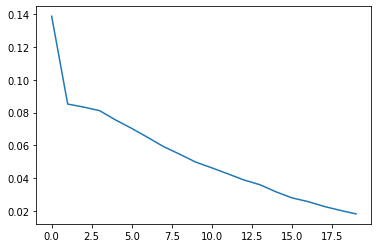

In [12]:
show_results_test_data(weights1, biases1, 100, "sigmoid")

### Testing our vectorized function for trainig the network 

Now in order to compare time consumed by each or the iterative and vectorized functions for network trainig, we train the network with the same measurements by our vectorized function.

In [13]:
%%time
cost_by_epochs, weights21, biases21 = learning_vectorized_sgd(1, 20, 10, weights_biases, number_of_samples=100, activation="sigmoid")

Wall time: 958 ms


Accuracy After Training: 0.64


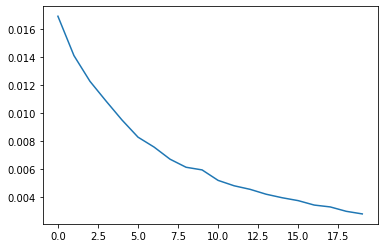

In [14]:
show_results_test_data(weights21, biases21, 100, activation="sigmoid")

######  Conclusion

The vectorized functions consumes mush less amount of time compared to the iterative function: <br>
Vectorized Wall Time of Training: 749ms <br>
Iterative Wall Time of Training: 1min 11s
_________________________

If we increase the epoch size of the vectorized function by 200 we will get the following results:<br>
earning Rate: 1 <br>
Number of Epochs: 200<br>
Batch Size: 10<br>
Number of samples: 1000<br>
Activation function: Sigmoid<br>

Accuracy before training: 0.14<br>
Wall time of running the training function: 8.15s<br>
Accuracy after training: 0.61<br>

In [15]:
W01, W12, W23, b1, b2, b3 = before_training("sigmoid", 100)
weights_biases = (W01, W12, W23, b1, b2, b3)

Accuracy Before Training: 0.15


In [16]:
%%time
cost_by_epochs, weights21, biases21 = learning_vectorized_sgd(1, 200, 10, weights_biases, number_of_samples=100, activation="sigmoid")

Wall time: 7.63 s


### Sigmoid VS Tanh

##### 1. Sigmoid Activation Function

First thing we do is to randomly create our wights and biases matrices and to calculate the accuracy before doing ant trainings on the network.

In [17]:
W01, W12, W23, b1, b2, b3 = before_training("sigmoid", 500)
weights_biases = (W01, W12, W23, b1, b2, b3)

Accuracy Before Training: 0.106



Learning Rate: 1 <br>
Number of Epochs: 200 <br>
Batch Size: 10<br>
Number of samples: 500<br>
Activation function: Sigmoid<br>

_________________________

Accuracy before training: 0.08<br>
Wall time of running the training function: 39.3s<br>
Accuracy after training: 0.789<br>

In [18]:
%%time
cost_by_epochs, weights21, biases21 = learning_vectorized_sgd(1, 200, 10, weights_biases, number_of_samples=500, activation="sigmoid")

Wall time: 37.8 s


Accuracy After Training: 0.78


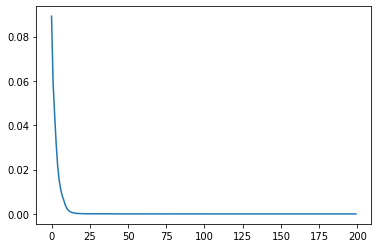

In [19]:
show_results_test_data(weights21, biases21, 1000, activation="sigmoid")

##### 2. Tanh Activation Function

First thing we do is to randomly create our wights and biases matrices and to calculate the accuracy before doing ant trainings on the network.

In [20]:
W01, W12, W23, b1, b2, b3 = before_training("tanh", 500)
weights_biases = (W01, W12, W23, b1, b2, b3)

Accuracy Before Training: 0.11



Learning Rate: 1 <br>
Number of Epochs: 200<br>
Batch Size: 10<br>
Number of samples: 500<br>
Activation function: Tanh<br>

______________________

Accuracy before training: 0.082<br>
Wall time of running the training function: 35.3s<br>
Accuracy after training: 0.635<br>

In [21]:
%%time
cost_by_epochs, weights22, biases22 = learning_vectorized_sgd(1, 200, 10, weights_biases, number_of_samples=500, activation="tanh")

Wall time: 33.2 s


Accuracy After Training: 0.655


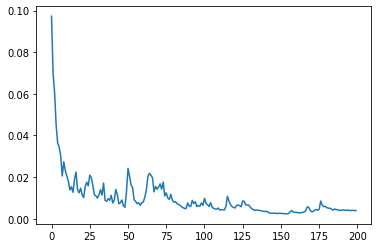

In [22]:
show_results_test_data(weights22, biases22, 1000, activation="tanh")

###### Comparing Sigmoid and Tanh

By compiling the cells above for a number ot times and comparing the results we can find out that the tanh is slightly faster than the sigmoid function but its accuracy after trainig will be lower.

### Testing the entire dataset

First thing we do is to randomly create our wights and biases matrices and to calculate the accuracy before doing ant trainings on the network.

In [23]:
W01, W12, W23, b1, b2, b3 = before_training("sigmoid", 60000)
weights_biases = (W01, W12, W23, b1, b2, b3)

Accuracy Before Training: 0.0905


Next we train our network by feeding the entire train images into the neural network and then training it by backpropagation. Here are some measurements we used to train our network:

Learning Rate: 1 <br>
Number of Epochs: 5 <br>
Batch Size: 50 <br>
Number of samples: 60000 <br>
Activation function: Sigmoid <br>

_________________________

Accuracy before training: 0.11 <br>
Wall time of running the training function: 1min 55s <br>
Accuracy of test set after training: 0.92 <br>
Accuracy of test set with 4 pixel shif after training: 0.29 <br>
Accuracy of train set after training: 0.93 <br>

In [24]:
%%time
cost_by_epochs, weights3, biases3 = learning_vectorized_sgd(1, 5, 50, weights_biases, number_of_samples=60000, activation = "sigmoid")

Wall time: 1min 58s


Accuracy After Training: 0.9324


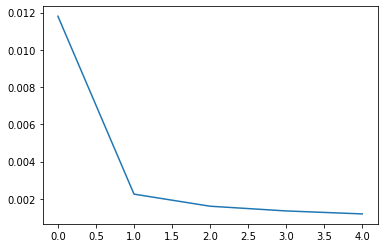

In [25]:
show_results_test_data(weights3, biases3, 60000, "sigmoid")

In [26]:
show_results_4pixel_shifed(weights3, biases3, 60000, "sigmoid")

Accuracy After Training: 0.3227


In [27]:
show_results_training_data(weights3, biases3, 60000, "sigmoid")

Accuracy After Training: 0.9415


###### Conclusion

The reason of the decrease in the accuracy of the 4pixel shifted test set is that the network is treained in the ways to set the weights ans biases for some exact input neurons, meaning that by changing those neurons the network will still apply the same amount of importantness to those despite the fact that our numbers have shifted by 4pixels and those neurons do not represent the numbered pixels of the image.